In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([[0.5,1.5],[0.55,1.8],[0.6,1.9],[0.65,2.2],[1.5,4.5],[1.55,4.8],[1.6,4.9],[1.65,4.2]])
y=[1,1,1,1,0,0,0,0]
X_test = np.array([[1.5,3.2]])

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter plot of X and y")
plt.show()

In [ ]:
# Calculate distances and pair with labels in a more concise way
distances_with_labels = [(np.linalg.norm(x - X_test), label) for x, label in zip(X, y)]
print(distances_with_labels)

[(np.float64(1.9723082923316022), 1), (np.float64(1.691892431568863), 1), (np.float64(1.58113883008419), 1), (np.float64(1.3124404748406686), 1), (np.float64(1.2999999999999998), 0), (np.float64(1.6007810593582117), 0), (np.float64(1.7029386365926404), 0), (np.float64(1.0111874208078342), 0)]


In [ ]:
# Sort the distances with labels
sort_distance_new = sorted(distances_with_labels, key=lambda item: item[0])
print(sort_distance_new)

[(np.float64(1.0111874208078342), 0), (np.float64(1.2999999999999998), 0), (np.float64(1.3124404748406686), 1), (np.float64(1.58113883008419), 1), (np.float64(1.6007810593582117), 0), (np.float64(1.691892431568863), 1), (np.float64(1.7029386365926404), 0), (np.float64(1.9723082923316022), 1)]


In [ ]:
from collections import Counter

k = 3
# Get the top k neighbors' labels directly
top_k_labels = [label for distance, label in sort_distance_new[:k]]

# Find the most frequent label
most_frequent_y = Counter(top_k_labels).most_common(1)[0][0]

print(f"Top {k} nearest neighbors (distance, y):")
print(sort_distance_new[:k])
print(f"Most frequent y-value among the top {k} neighbors: {most_frequent_y}")
print("Hence y belongs to ", most_frequent_y)

Top 3 nearest neighbors (distance, y):
[(np.float64(1.0111874208078342), 0), (np.float64(1.2999999999999998), 0), (np.float64(1.3124404748406686), 1)]
Most frequent y-value among the top 3 neighbors: 0
Hence y belongs to  0


In [ ]:
print(f"The predicted class for X_test is: {most_frequent_y}")

The predicted class for X_test is: 0


In [ ]:
def knn(X_train, y_train, X_test_point, k):
    distances = [(np.linalg.norm(X_test_point - x), y) for x, y in zip(X_train, y_train)]
    sorted_distances = sorted(distances, key=lambda item: item[0])
    top_k_neighbors = sorted_distances[:k]
    top_k_labels = [label for distance, label in top_k_neighbors]
    most_frequent_label = Counter(top_k_labels).most_common(1)[0][0]
    return most_frequent_label

# Example usage (using the X and y defined earlier)
predicted_class = knn(X, y, X_test, k)
print(f"The predicted class for X_test using the knn function is: {predicted_class}")

The predicted class for X_test using the knn function is: 0


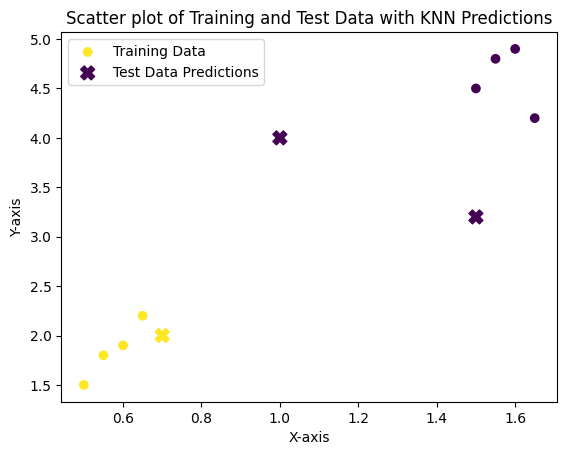

In [ ]:
# Re-plot the training data
plt.scatter(X[:, 0], X[:, 1], c=y, label='Training Data')

# Plot the multiple test points with their predicted classes
X_test_multiple = np.array([[1.5, 3.2], [0.7, 2.0], [1.0, 4.0]])
predicted_classes_multiple = [knn(X, y, point, k) for point in X_test_multiple]

plt.scatter(X_test_multiple[:, 0], X_test_multiple[:, 1], c=predicted_classes_multiple, marker='X', s=100, label='Test Data Predictions')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter plot of Training and Test Data with KNN Predictions")
plt.legend()
plt.show()